## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here (5 points)**   

##################################     
TODO: Derive you answer hear
#################################
$\Delta W_k = \left\{
    \begin{aligned}
        & 0, & k = y^i_{pred} = y^i \\
        & x^i, & k = y^i_{pred} \neq y^i
    \end{aligned}
\right.$ and $W_k^{new} = W_k^{old} - \eta\Delta W_k$

$\Delta b = \left\{
    \begin{aligned}
        & 0, & k = y^i_{pred} = y^i \\
        & 1, & k = y^i_{pred} \neq y^i
    \end{aligned}
\right.$ and $b^{new} = b^{old} - \eta\Delta b$



                        

In [106]:
from sklearn import datasets
import numpy as np
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [107]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [108]:
## split the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:', X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:', y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [109]:
class MultiClsPLA(object):

    ## We recommend to absorb the bias into weight.  W = [w, b]

    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train  # N x (D + 1)
        self.y_train = y_train  # N x 1
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)  # C x (D + 1)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []

    def initial_weight(self, weight_dimension, num_cls):
        weight = None
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  small std and zero mean gaussian   ##
        #########################################
        weight = np.random.normal(0, 0.01, (num_cls, weight_dimension))

        return weight

    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normalize the data       ##
        #####################################
        norm_data = (data - self.sample_mean) / self.sample_std
        return norm_data

    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train: np.ndarray = X_train[shuffle_idx]
        y_train: np.ndarray = y_train[shuffle_idx]
        train_acc = None
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        y_pred = np.argmax(X_train @ self.weight.T, axis=0)

        train_acc = np.sum(y_pred == y_train) / y_train.size()
        self.total_acc_train.append(train_acc)
        diff_one_hot = np.eye(X_train.shape[0], self.weight.shape[0])[y != y_pred]  # N x C
        self.weight -= self.lr * diff_one_hot.T @ X_train

        return train_acc

    def test_step(self, X_test, y_test):
        X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = None

        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################

        y_pred = np.argmax(X_test @ self.weight.T, axis=0)
        test_acc = np.sum(y_pred == y_test) / y_test.size()
        self.total_acc_tst.append(test_acc)

        return test_acc

    def train(self):
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]

        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################

        self.X_train = np.insert(self.X_train, self.X_train.shape[1], 1)
        self.X_test = np.insert(self.X_test, self.X_test.shape[1], 1)

        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test, y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f' % training_acc, 'tst_acc:%.3f' % tst_acc)

    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

epoch: 0 traing_acc:0.029 tst_acc:0.022
epoch: 1 traing_acc:0.029 tst_acc:0.022
epoch: 2 traing_acc:0.029 tst_acc:0.022
epoch: 3 traing_acc:0.029 tst_acc:0.022
epoch: 4 traing_acc:0.029 tst_acc:0.022
epoch: 5 traing_acc:0.029 tst_acc:0.022
epoch: 6 traing_acc:0.029 tst_acc:0.022
epoch: 7 traing_acc:0.029 tst_acc:0.022
epoch: 8 traing_acc:0.029 tst_acc:0.022
epoch: 9 traing_acc:0.029 tst_acc:0.022
epoch: 10 traing_acc:0.029 tst_acc:0.022
epoch: 11 traing_acc:0.029 tst_acc:0.044
epoch: 12 traing_acc:0.038 tst_acc:0.044
epoch: 13 traing_acc:0.038 tst_acc:0.044
epoch: 14 traing_acc:0.038 tst_acc:0.044
epoch: 15 traing_acc:0.038 tst_acc:0.044
epoch: 16 traing_acc:0.038 tst_acc:0.044
epoch: 17 traing_acc:0.038 tst_acc:0.044
epoch: 18 traing_acc:0.038 tst_acc:0.044
epoch: 19 traing_acc:0.038 tst_acc:0.044
epoch: 20 traing_acc:0.038 tst_acc:0.044
epoch: 21 traing_acc:0.048 tst_acc:0.044
epoch: 22 traing_acc:0.048 tst_acc:0.044
epoch: 23 traing_acc:0.048 tst_acc:0.067
epoch: 24 traing_acc:0.048

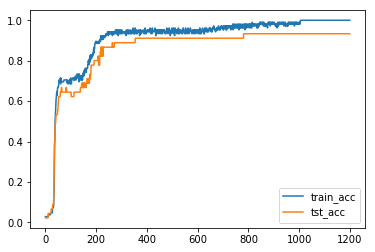

In [110]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches
perceptronModel = MultiClsPLA(X_train, y_train, X_test, y_test, lr=1e-3, num_epoch=1000,
                              weight_dimension=X_train.shape[1] + 1, num_cls=3)
perceptronModel.train()

fig = plt.figure()
plt.plot(perceptronModel.total_acc_train)
plt.plot(perceptronModel.total_acc_tst)
